# Homework 1


## References

+ Lectures 1-4 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.


## Student details

+ **姓名:** 郭俊烨
+ **学号:** 07Q20108
+ **Email:** gjy2383@gmail.com
------
+ **姓名:** 刘宏毅
+ **学号:** 07Q20138
+ **Email:** 213201699@seu.edu.cn

## Problem 1： Compute $\pi$

Up through history, great minds have developed different computational schemes for the number $\pi$. We will here consider two such schemes, one by Leibniz (1646– 1716), and one by Euler (1707–1783).

The scheme by Leibniz may be written

$$
\pi = 8 \sum^{\infty}_{k=0} \frac{1}{(4k+1)(4k+3)}
$$
while one form of the Euler scheme may appear as
$$
\pi = \sqrt{ 6\sum^{\infty}_{k=1} \frac{1}{k^2}}
$$
If only the first $N$ terms of each sum are used as an approximation to $\pi$, each modified scheme will have computed $\pi$ with some error.

Write a program that takes $N$ as input from the user, and plots the error development with both schemes as the number of iterations approaches $ N$. Your program should also print out the final error achieved with both schemes, i.e. when the number of terms is $N$. Run the program with $N = 100$ and explain briefly what the graphs show.

In [ ]:
#代码
from numpy import *
from matplotlib.pyplot import *

def LeibnizScheme(N):
    PiTemp=zeros(N+1)#利用向量方便后续操作,因只考虑正整数迭代次数故为N+1
    PiTemp[0]=1/3#初值，向量首个分量
    n=1
    while n<N+1:#从n=1，即向量第二个分量开始
        PiTemp[n]=PiTemp[n-1]+1/((4*n+1)*(4*n+3))
        n+=1
    return 8*PiTemp#最后处理

def  EulerScheme(N):
    PiTemp=zeros(N+1)#初值为0，不需另行处理
    n=1
    while n<N+1:
        PiTemp[n]=PiTemp[n-1]+1/(n**2)
        n+=1
    return (6*PiTemp)**0.5

while True:
    N=input("请输入迭代次数N(正整数):")
    N=int(N)
    if N<=0:#检查是否为正整数
        print("请输入正整数")
    else:
        break
LeibnizPi=LeibnizScheme(N)
EulerPi=EulerScheme(N)
LeibnizPiError=abs(LeibnizPi-pi)#误差考虑绝对值
EulerPiError=abs(EulerPi-pi)
nVals=array(range(1,N))#1-N的向量
figure()
title("Iteration-Error")
xlabel("Iteration")
ylabel("Error")
print("Leibniz方法所得近似值",LeibnizPi[N]," 最终误差",LeibnizPiError[N])
plot(nVals,LeibnizPiError[nVals],label="Leibniz scheme")
print("Euler方法所得近似值",EulerPi[N]," 最终误差",EulerPiError[N])
plot(nVals,EulerPiError[nVals],label="Euler scheme")
legend()
show()


# 运行实例
```
请输入迭代次数N(正整数):0
请输入正整数
请输入迭代次数N(正整数):-1
请输入正整数
请输入迭代次数N(正整数):100
Leibniz方法所得近似值 3.136642188870299  最终误差 0.004950464719494008
Euler方法所得近似值 3.1320765318091053  最终误差 0.009516121780687836
```



可见莱布尼兹方法在各个迭代次数上表现均优于欧拉方法。在迭代次数达到50之前差距较显著。

## Problem 2:  Fibonacci Numbers

The Fibonacci numbers is a sequence of integers in which each number (except the two first ones) is given as a sum of the two preceding numbers:
$$
F_n=F_{n-1}+F_{n-2}, \quad F_0=1, F_1 = 1, \quad n = 2,3,...
$$
Thus, the sequence starts out as
$$
1, 1, 2, 3,5,8,13,21,34,...
$$

- a) Write a fucnion that generates, and returns, the $N$ first Fibonacci numbers, when $N$ is an input parameter to the function.
- b) The famous Johannes Kepler found that the ratio of consecutive Fibonacci numbers converges to the *golden ratio*, i.e.
$$
\displaystyle \lim_{n \rightarrow \infty} \frac{F_{n+1}}{F_n} = \frac{1+\sqrt{5}}{2}.
$$
Checks (you decide *how*) whether Kepler’s understanding seems correct. Place a call to the function in the test block and run the program. Was Kepler right?
- c) With the iterative procedure of the previous question, the ratios converged to the golden ratio at a certain *rate*. This brings in the concept of *convergence rate*, which we have not yet addressed. However, if you are motivated, you may get a head start right now. Call the function from the test block and run the program. Do the convergence rates approach the expected value?

> In brief, if we define the difference (in absolute value) between $\frac{F_{n+1}}{F_n}$ and the golden ratio as the error $e_n$ at iteration $n$, this error (when small enough) will develop as $e_{n+1} = Ce_n^q$, where $C$ is some constant and $q$ is the *convergence rate* (in fact, this error model is typical for iterative methods). That is, we have a relation that predicts how the error changes from one iteration to the next. With the given error model, we may compute the convergence rate from:
$$
q = \frac{\ln(e_{n+1}/e_n)}{\ln(e_n/e_{n-1})}.
$$



In [3]:

# a)
#函数
from numpy import *

def FibonacciN(N):
    if N==1:
        return [1]
    if N==2:
        return [1,1]#特殊处理
    Fibtemp=ones(N,int)#N个1,索引最大为N-1,元素为整数
    n=2#从第三个开始
    while n<N:
        Fibtemp[n]=Fibtemp[n-1]+Fibtemp[n-2]
        n+=1
    return Fibtemp

#在函数后添加测试用部分
while True:
    N=input("请输入正整数N:")
    N=int(N)
    if N<=0:#检查是否为正整数
        print("请输入正整数")
    else:
        break

Fib=FibonacciN(N)
print(Fib)

[1]


# 测试
```
请输入正整数N:1
[1]
-------
请输入正整数N:2
[1, 1]
-------
请输入正整数N:9
[ 1  1  2  3  5  8 13 21 34]
```
功能正常。

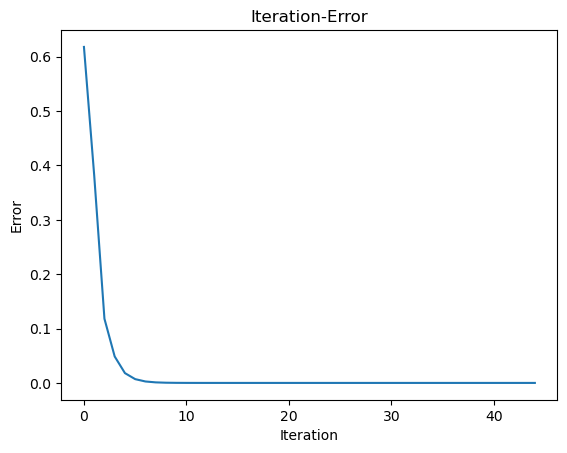

In [4]:
# b)
# 在函数后添加代码
from matplotlib.pyplot import *
N=46#超过46时上溢
Fib=FibonacciN(N)
ErrorRatio=zeros(N-1)#比生成的数列的项数少一
n=0
while n<N-1:#注意边界
    ErrorRatio[n]=Fib[n+1]/Fib[n]
    n+=1
ErrorRatio=abs(ErrorRatio-(1+5**0.5)/2)
nVals=array(range(N-1))#0-(N-2)的向量
figure()
title("Iteration-Error")
xlabel("Iteration")
ylabel("Error")
plot(nVals,ErrorRatio[nVals])
show()


# 测试
得到图像<br>
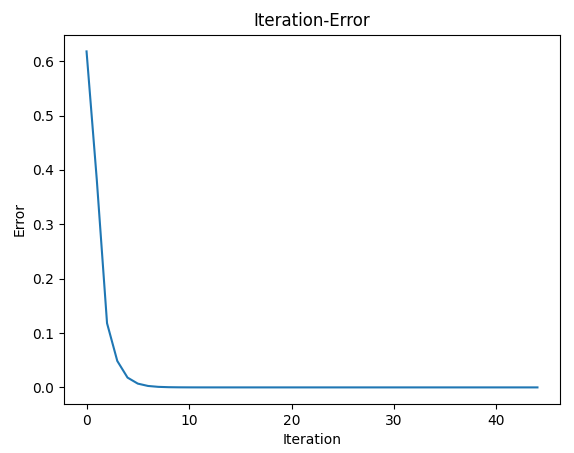
<br>根据图像,推断Kepler是对的。<br>

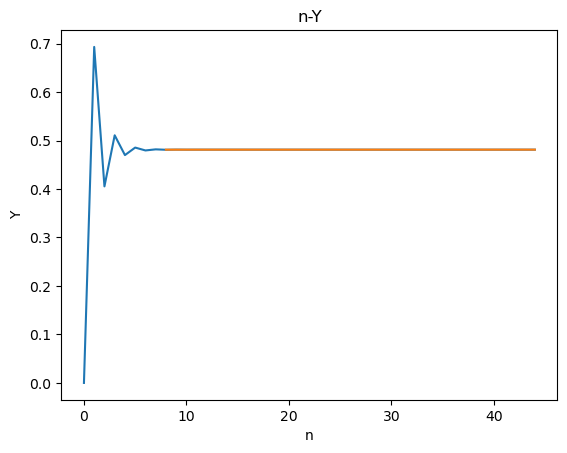

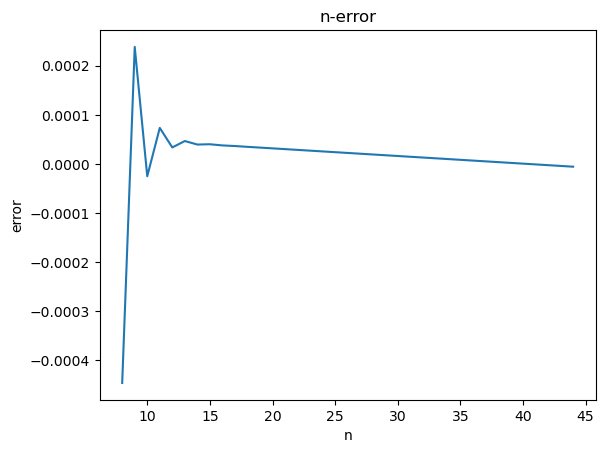

In [5]:
# c)
from matplotlib.pyplot import *
from numpy import polynomial as P

N=46#超过46时上溢
Fib=FibonacciN(N)
nVals=array(range(N-1))
LogConvergenceRate=zeros(N-1)#比生成的数列的项数少一
n=0
while n<N-1:#注意边界
    LogConvergenceRate[n]=log(Fib[n+1]/Fib[n])#取对数，进行多项式拟合
    n+=1

Fitcurve=P.Polynomial.fit(nVals[8:45],LogConvergenceRate[8:45],deg=1)
#前段数据波动较大，考虑到是为研究极限情况，舍去 #注意边界 #一次多项式拟合
LogConvergenceRateFit=Fitcurve(nVals)#生成拟合数据
figure()
title("n-Y")
xlabel("n")
ylabel("Y")
plot(nVals,LogConvergenceRate[nVals])
plot(nVals[8:45],LogConvergenceRateFit[nVals[8:45]-8])#注意边界
show()#数据曲线
figure()
title("n-error")
xlabel("n")
ylabel("error")
plot(nVals[8:45],(LogConvergenceRate[nVals[8:45]]-LogConvergenceRateFit[nVals[8:45]-8])/LogConvergenceRate[nVals[8:45]])
show()#拟合数据的百分误差曲线

## Problem 3:  Find Crossing Points of Two Graphs

Consider two functions $f(x) = x$ and $g(x) = x^2$ on the interval $[−4, 4]$.
Write a program that, by trial and error, finds approximately for which values of $x$ the two graphs cross, i.e., $f(x) = g(x)$. Do this by considering $N$ equally distributed points on the interval, at each point checking whether $|f (x)−g(x)| < \epsilon$, where $\epsilon$ is some small number. Let $N$ and $\epsilon$ be user input to the program and let the result be printed to screen. Run your program with $N = 400$ and $\epsilon = 0.01$. Explain the output from the program. Finally, try also other values of $N$, keeping the value
of $\epsilon$ fixed. Explain your observations.



In [ ]:

#原程序
from numpy import *

while True:
    N=input("请输入分点数N(大于2的正整数):")
    N=int(N)
    if N<3:#检查
        print("请输入大于2的正整数")#3个点等分才有意义
    else:
        while True:
            eps=input("请输入误差限epsilon(小正实数):")
            eps=float(eps)
            if eps<=0:#检查是否为正数，程序上不需要检查是否充分小
                print("请输入正数")
            else:
                break
        break

fVals=linspace(-4,4,N)#取等分点，直接视为f(x)函数值
gVals=fVals**2
Error=abs(fVals-gVals)
flag=1
for n in Error:
    if n<eps:
        flag=0
        print(n,"处,|f(x)-g(x)|<epsilon,近似视为f(x)=g(x)")
if flag:
    print("所取分点处总有|f(x)-g(x)|>=epsilon,近似视为f(x)与g(x)不相等")







# 运行实例
```
请输入分点数N(大于2的正整数):400
请输入误差限epsilon(小正实数):0.01
0.009924560775371795 处,|f(x)-g(x)|<epsilon,近似视为f(x)=g(x)
0.007462264684267805 处,|f(x)-g(x)|<epsilon,近似视为f(x)=g(x)
```



对连续函数F(x)=|f(x)-g(x)|,\{x|F(x)<$\epsilon$\}为区间,故可能包含多个所取分点。



In [2]:
#修改程序
from numpy import *

eps=0.01
N=50
while N<501:
    fVals=linspace(-4,4,N)#取等分点，直接视为f(x)函数值
    gVals=fVals**2
    Error=abs(fVals-gVals)
    flag=0
    for n in Error:
        if n<eps:
           flag+=1
    print("N=",N,"时,有",flag,"个点处|f(x)-g(x)|<epsilon")
    N+=50


N= 50 时,有 0 个点处|f(x)-g(x)|<epsilon
N= 100 时,有 0 个点处|f(x)-g(x)|<epsilon
N= 150 时,有 1 个点处|f(x)-g(x)|<epsilon
N= 200 时,有 0 个点处|f(x)-g(x)|<epsilon
N= 250 时,有 0 个点处|f(x)-g(x)|<epsilon
N= 300 时,有 1 个点处|f(x)-g(x)|<epsilon
N= 350 时,有 1 个点处|f(x)-g(x)|<epsilon
N= 400 时,有 2 个点处|f(x)-g(x)|<epsilon
N= 450 时,有 3 个点处|f(x)-g(x)|<epsilon
N= 500 时,有 3 个点处|f(x)-g(x)|<epsilon



# 运行结果
```
N= 50 时,有 0 个点处|f(x)-g(x)|<epsilon
N= 100 时,有 0 个点处|f(x)-g(x)|<epsilon
N= 150 时,有 1 个点处|f(x)-g(x)|<epsilon
N= 200 时,有 0 个点处|f(x)-g(x)|<epsilon
N= 250 时,有 0 个点处|f(x)-g(x)|<epsilon
N= 300 时,有 1 个点处|f(x)-g(x)|<epsilon
N= 350 时,有 1 个点处|f(x)-g(x)|<epsilon
N= 400 时,有 2 个点处|f(x)-g(x)|<epsilon
N= 450 时,有 3 个点处|f(x)-g(x)|<epsilon
N= 500 时,有 3 个点处|f(x)-g(x)|<epsilon
```



随着N增加,点分布更细密,所取点更有可能落入\{x|F(x)<$\epsilon$\}之中,在分点数较少时,随分点数增加,所取分点的数值变动较大,故可能出现分点数增加了,落入该区间中的点反而减少了的现象。





## Problem 4: Fit Sines to Straight Line

A lot of technology, especially most types of digital audio devices for processing sound, is based on representing a signal of time as a sum of sine functions. Say the signal is some function $f(t)$ on the interval $[−\pi, \pi]$ (a more general interval $[a, b]$ can easily be treated, but leads to slightly more complicated formulas). Instead of working with $f(t)$ directly, we approximate $f$ by the sum
$$
S_N(t) = \sum^N_{n=1}b_n \sin(nt),
$$
where the coefficients $b_n$ must be adjusted such that $S_N(t)$ is a good approximation to $f(t)$. We shall in this exercise adjust $b_n$ by a trial-and-error process.

- 1) Make a function `sinesum(t, b)` that returns $S_N(t)$, given the coefficients $b_n$ in an array $b$ and time coordinates in an array $t$. Note that if $t$ is an array, the return value is also an array.
- 2) Write a function `test_sinesum()` that calls `sinesum(t, b)` in 1) and determines if the function computes a test case correctly. As test case, let $t$ be an array with values $−\pi/2$ and $\pi/4$, choose $N = 2$, and $b_1 = 4$ and $b_2 = −3$. Compute $S_N(t)$ by hand to get reference values.
- 3) Make a function `plot_compare(f, N, M)` that plots the original function $f(t)$ together with the sum of sines $S_N(t)$, so that the quality of the approximation $S_N(t)$ can be examined visually. The argument `f` is a Python function implementing $f(t)$, $N$ is the number of terms in the sum $S_N(t)$, and $M$ is the number of uniformly distributed $t$ coordinates used to plot $f$ and $S_N$.

- 4) Write a function `error(b, f, M)` that returns a mathematical measure of the error in $S_N(t)$ as an approximation to $f(t)$:
$$
E = \sqrt{\sum_i(f(t_i)-S_N(t_i))^2}
$$
where the $t_i$ values are $M$ uniformly distributed coordinates on $[−\pi,\pi]$. The array $b$ holds the coefficients in $S_N$ and $f$ is a Python function implementing the mathematical function $f(t)$.
- 5) Make a function `trial(f, N)` for interactively giving $b_n$ values and getting a plot on the screen where the resulting $S_N(t)$ is plotted together with $f(t)$. The error in the approximation should also be computed as indicated in 4). The argument `f` is a Python function for $f(t)$ and $N$ is the number of terms $N$ in the sum $S_N(t)$. The `trial` function can run a loop where the user is asked for the $b_n$ values in each pass of the loop and the corresponding plot is shown. You must find a way to terminate the loop when the experiments are over. Use $M=500$ in the calls to `plot_compare` and `error`.

- 6) Choose $f(t)$ to be a straight line $f(t) = \frac{1}{\pi}t$ on $[−\pi, \pi]$. Call `trial(f, 3)` and try to find through experimentation some values $b_1, b_2$, and $b_3$ such that the sum of sines $S_N(t)$ is a good approximation to the straight line.

- 7) Now we shall try to automate the procedure in 6). Write a function that has three nested loops over values of $b_1, b_2$, and $b_3$. Let each loop cover the interval $[−1, 1]$ in steps of 0.1. For each combination of $b_1, b_2$, and $b_3$, the error in the approximation $S_N$ should be computed. Use this to find, and print, the smallest error and the corresponding values of $b_1, b_2$, and $b_3$. Let the program also plot $f$ and the approximation $S_N$ corresponding to the smallest error.


**Answer:**
<br><br><br><br><br><br><br><br>

The smallest error:
 12.935790247939138
The best coficients:
 [-1.0, -1.0, -0.5000000000000001]


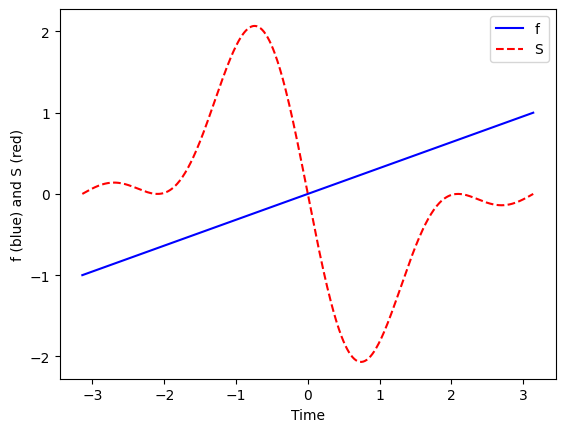

Error/n 12.935790247939138
Another trial? (y/n)
n


In [2]:
# Problem4: Fit Sines to Straight Line
import numpy as np
import matplotlib.pyplot as plt

#left_end: the minimum time stamp, default is -\pi
#right_end: the maximum time stamp, default is \pi
left_end = -np.pi
right_end = np.pi

#Define the function
def f(t):
    f = 1 / np.pi * t
    return f


# t: time coordinates
# b: coefficients
def sinesum(t, b):

    # change into numpy array type, in order to use the functions in numpy
    t = np.array(t)
    b = np.array(b)

    # caculate the sum of S_N(t)
    S_N = []
    for t_stamp in t.flatten():
        n = len(b)
        N = np.linspace(1, n, n)
        s = np.dot(b, np.sin(N * t_stamp))

    # if t is an array then append the result to S_N
    S_N.append(s)

    return S_N

# a test function that calls sinesum(t, b)
def test_sinesum():
    t = [-np.pi/2, np.pi/4]
    b = [4, -3]
    return sinesum(t,b)


#f: a Python function
#N: the number of terms
#M: the number of uniformly distributed t coordinates
def plot_compare(f, b, N, M):
    time = np.linspace(left_end, right_end, M)
    y = f(time)
    S = [sinesum(t, b) for t in time]

    #plot
    plt.plot(time, y, 'b-', label='f')
    plt.plot(time, S, 'r--', label='S')
    plt.xlabel('Time')
    plt.ylabel('f (blue) and S (red)')
    plt.legend()
    plt.show()


#f: a Python function
#N: the number of terms
#M: the number of uniformly distributed t coordinates
def error(b, f, M):
    time = np.linspace(left_end, right_end, M)
    y = f(time)
    S = sinesum(time, b)
    err = np.sqrt(np.sum((y - S)**2))
    return err


#f: a Python function
#N: the number of terms
#b: coefficients
def trial(f, N, b):
    M = 500
    new_trial = True
    while new_trial:
        plot_compare(f, b, N, M)
        print('Error/n',error(b, f, M))
        flag = input('Another trial? (y/n)\n')
        if flag == 'n':
            new_trial =False


#Find the best cofficients
#f: a Python function
#M: the number of uniformly distributed t coordinates
def find_cof(f, M):
    step = 0.1
    start = -1
    end = 1
    min_err = error([-1, -1, -1], f, M)
    for b1 in np.arange(start, end, step):
        for b2 in np.arange(start, end, step):
            for b3 in np.arange(start, end, step):
                b = [b1, b2, b3]
                err = error(b, f, M)
                if(err < min_err):
                    min_err = err
                    best_cof = b
    print('The smallest error:\n', min_err)
    print('The best coficients:\n', best_cof)
    return best_cof


if __name__ == "__main__":
    b = find_cof(f, 500)
    trial(f, 3, b)


-End-